# **Housing Sale Price Study**


## Objectives

- Answer Business Requirment 1
Business Requirment 1 states: The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.


## Inputs

- inputs/datasets/collection/HousePrices.csv

## Outputs

- Develop and implement code to address Business Requirement 1, and integrate the resulting analysis and visualisations into the Streamlit dashboard application.


# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Heritage-Housing/jupyter_notebooks'

We want to make the child of the current directory the new current directory
* os.chdir() defines the new current directory

In [3]:
import os

os.chdir('/workspaces/Heritage-Housing')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/Heritage-Housing'

# Load Data

In [5]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HousePrices.csv")
    )
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500


## Correlation Study

In [6]:
df[df.columns[df.dtypes == 'object']] = df[df.columns[df.dtypes == 'object']].fillna("Missing")

In [7]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_encoder = encoder.fit_transform(df)
df_encoder.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,...,BsmtFinType1_BLQ,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Missing,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,65.0,...,0,0,1,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,80.0,...,0,0,1,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,68.0,...,0,0,1,0,0,0,1,0,0,0


### **Pearson and Spearman Corrolation Methods**

<span style="color: red;">The Pearson correlation</span> coefficient measures the strength and direction of the linear relationship between two continuous variables. It ranges from -1 to +1, where values close to +1 or -1 indicate a strong positive or negative linear association, respectively, and 0 indicates no linear correlation. This method assumes the data are normally distributed and that the relationship is linear. It is sensitive to outliers and may not perform well if these assumptions are violated.

<span style="color: red;">The Spearman correlation</span> coefficient measures the strength and direction of a monotonic relationship between two variables based on the ranked values rather than the raw data. It also ranges from -1 to +1, with values near these extremes indicating a strong monotonic relationship. Spearman correlation does not require linearity or normality, making it more robust to outliers and suitable for capturing non-linear, monotonic associations.

**We will use .corr() for spearman and pearson methods, and investigate the top 10 correlations**

In [8]:
# Spearman (Non Linear)
corr_spearman = df_encoder.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_table = corr_spearman.reset_index()
corr_table.columns = ['Variable', 'spearman Correlation']

print(corr_table.to_string(index=False))

      Variable  spearman Correlation
   OverallQual              0.809829
     GrLivArea              0.731310
     YearBuilt              0.652682
    GarageArea              0.649379
   TotalBsmtSF              0.602725
   GarageYrBlt              0.593788
KitchenQual_TA             -0.581803
      1stFlrSF              0.575408
  YearRemodAdd              0.571159
KitchenQual_Gd              0.478583


In [9]:
# Pearson (Linear)

corr_Pearson = df_encoder.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)

corr_table = corr_Pearson.reset_index()
corr_table.columns = ['Variable', 'Pearson Correlation']

print(corr_table.to_string(index=False))


      Variable  Pearson Correlation
   OverallQual             0.790982
     GrLivArea             0.708624
    GarageArea             0.623431
   TotalBsmtSF             0.613581
      1stFlrSF             0.605852
     YearBuilt             0.522897
KitchenQual_TA            -0.519298
  YearRemodAdd             0.507101
KitchenQual_Ex             0.504094
   GarageYrBlt             0.486362


For both methods, we observe weak to moderate correlations between `SalePrice` and the individual variables. Therefore, we will focus on the top five correlation values identified in the encoded dataset (df_encoder) and further analyze the corresponding variables in the original dataset (df).

In [10]:
top_n = 5
set(corr_Pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

The variables identified as having the strongest correlations with the target include:

- **1stFlrSF**: First floor square footage of the house.
  
- **GarageArea:** Size of the garage in square feet.
  
- **GrLivArea**: Above-ground living area square footage.
  
- **OverallQual**: Overall quality rating of the material and finish.
  
- **TotalBsmtSF**: Total basement area in square feet.
  
- **YearBuilt**: The year the house was originally constructed.

In [ ]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study


AttributeError: 'DataFrame' object has no attribute 'dtype'

## EDA on selected variables

In [12]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500


### Variables distribution by SalePrice
We plot the distribution (numerical) of the selected variables.

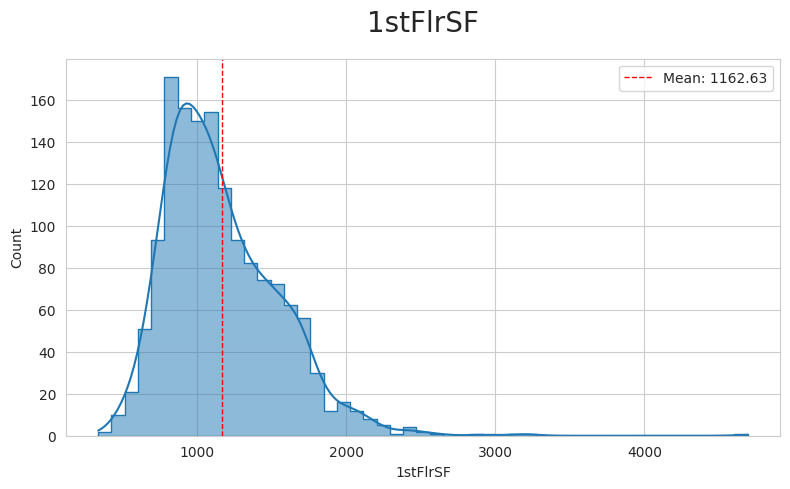

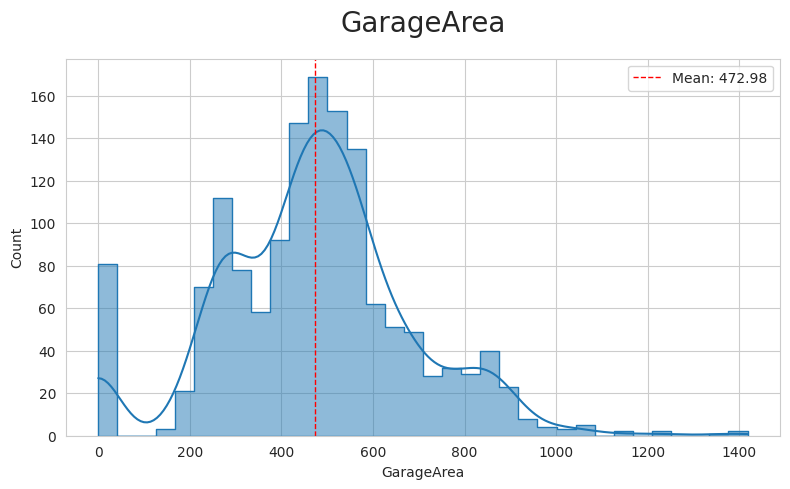

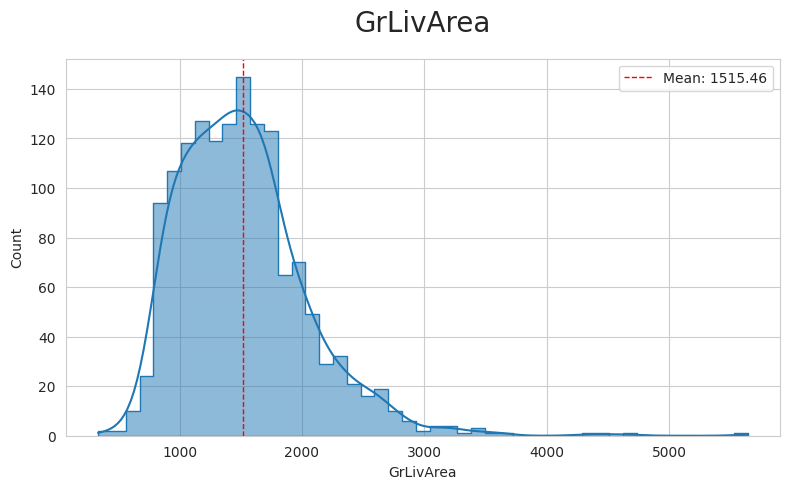

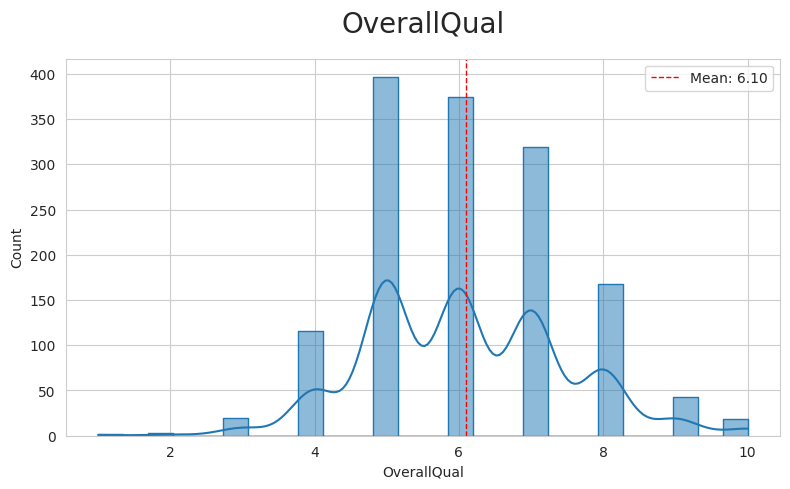

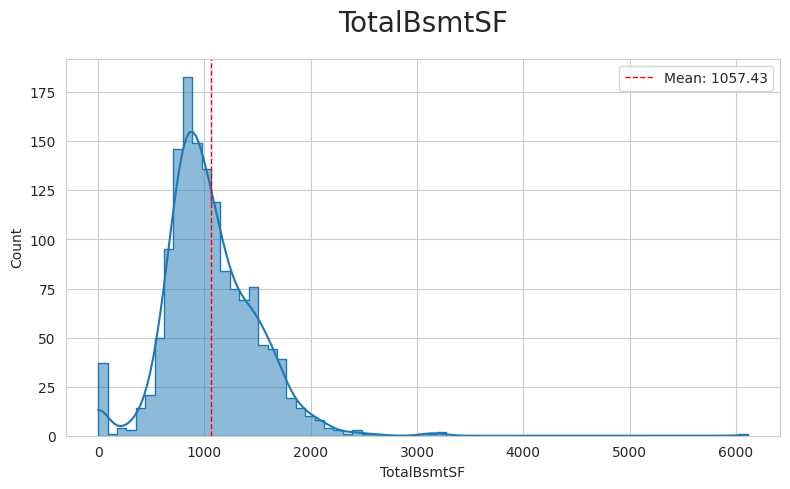

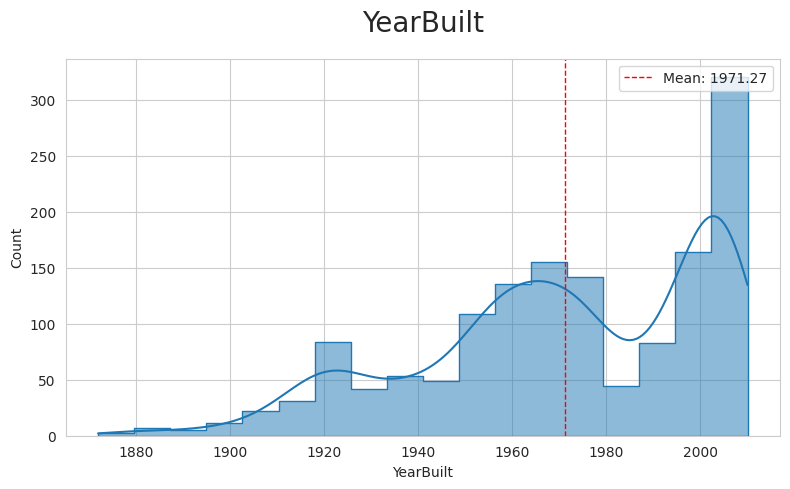

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, element="step")
    
    mean_val = df[col].mean()
    
    # Add a vertical line for the mean
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_val:.2f}')
    
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

target_var = 'SalePrice'
for col in vars_to_study:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")
    